<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/Mixture_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixture Designs: Elongation of Yarn
This example has to do with the elongation of yarn based on its component fabrics. There are three components in this mixture and each component is a synthetic material. The mixture design was one that we had looked at previously. It is a simple lattice design of degree 2. This means that it has mixtures of 0, 1/2, 100%. The components of this design are made up of these three possibilities.

adapted from https://online.stat.psu.edu/stat503/lesson/11/11.3/11.3.3

In [ ]:
import pandas as pd
data=pd.read_csv('mixture_data.csv', sep=';')


data=data.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
data

,A,B,C,Y
0,1.0,0.0,0.0,11.0
1,0.5,0.5,0.0,15.0
2,0.5,0.0,0.5,17.7
3,0.0,1.0,0.0,8.8
4,0.0,0.5,0.5,10.0
5,0.0,0.0,1.0,16.8
6,1.0,0.0,0.0,12.4
7,0.5,0.5,0.0,14.8
8,0.5,0.0,0.5,16.4
9,0.0,1.0,0.0,10.0


the first 6 runs show you the pure components, and in addition, you have the 5 mixed components. All of this was replicated 3 times so that we have 15 runs. There were three that had missing data.


Mixture designs with K=3 can be visualized using ternary diagrams.

In [ ]:
import plotly.express as px
fig = px.scatter_ternary(data, a="A", b="B", c="C")

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()




Lets' add the response. We can always do a linear interpolation and plot a contour surface.

In [ ]:
import plotly.figure_factory as ff
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig2 = ff.create_ternary_contour(np.array([data['A'], data['B'], data['C']]), data['Y'],
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian')
fig2.update_layout(title='Interpolated Contour Plot')


# Show the combined figure
fig2.show()

But we can also fit a model to plot the contour surface.

Let us fit a linear model. Remember we only have 6 points in this design, the vertex, the half-lengths, so we are fitting a response surface to these 6 points.

To add the constraint, we now fit to a model of the following form:


y = $\beta_1$A + $\beta_2$B + $\beta_3$C - 1        




In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


mod = smf.ols(formula='Y ~ A + B + C  - 1', data=data)

res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     4.477
Date:                Wed, 01 Oct 2025   Prob (F-statistic):             0.0353
Time:                        07:38:22   Log-Likelihood:                -33.574
No. Observations:                  15   AIC:                             73.15
Df Residuals:                      12   BIC:                             75.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             14.9945      1.410     10.632      0.000      11.922      18.068
B              9.8309      1.410      6.970      0.000       6.758      12.904
C             15.7945      1.410     11.199      0.000      12.722      18.868
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.886
Skew:                          -0.221   Prob(JB):                        0.642
Kurtosis:                       1.894   Cond. No.                         1.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we get 2 df linear, 3 df quaratic, these are the five regression parameters. If you look at the individual coefficients, six of them because there is no intercept, three linear and three cross-product terms... The 9 df for error are from the triple replicates and the double replicates. This is pure error and there is no additional df for lack of fit in this full model.

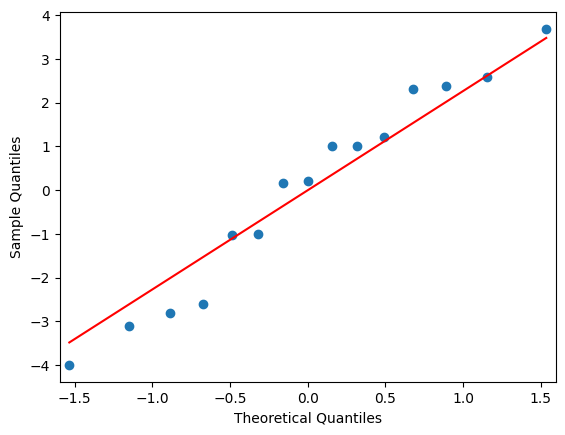

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = res.resid
fig = sm.qqplot(residuals, line="s")
plt.show()

In [ ]:
import itertools
import numpy as np
#dd=np.array([dat['A'],dat['B'],dat['C']])
#res.params

AA=np.arange(0, 1, 0.1)
BB=np.arange(0, 1, 0.1)
CC=np.arange(0, 1, 0.1)
Target=1.
inputs= pd.DataFrame(list(itertools.product(AA,BB,CC)), columns=['A','B','C'])
#sum(inputs.iloc[1])
input_target=[]
for i in range(0,len(inputs)):
  dd = sum(inputs.iloc[i])
  if dd == Target:
    input_target.append(inputs.iloc[i])
df=pd.DataFrame(input_target)
#df

ypred=res.predict(df[['A','B','C']])

In [ ]:
fig1 = ff.create_ternary_contour(np.array([data['A'], data['B'], data['C']]), data['Y'],
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian')
#fig1.update_layout(title='Interpolated Contour Plot')
# Generate contour plot from quadratic model
ypred = res.predict(df[['A','B','C']])
fig2 = ff.create_ternary_contour(np.array([df['A'], df['B'], df['C']]), ypred,
                                 pole_labels=['A', 'B', 'C'],
                                 interp_mode='cartesian')
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'ternary'}, {'type': 'ternary'}]])

# Add traces from both figures to the subplots
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(title_text="Interpolated vs Model Contour Plots")

# Show the combined figure
fig.show()

Let us fit a quadratic model (linear + interaction terms). Remember we only have 6 points in this design, the vertex, the half-lengths, so we are fitting a response surface to these 6 points.

y = $\beta_1$A + $\beta_2$B + $\beta_3$C + $\beta_4$AB + $\beta_5$AC + $\beta_c$BC - 1        

In [ ]:
mod2 = smf.ols(formula='Y ~ A + B + C + A:B + A:C + B:C - 1', data=data)

res2 = mod2.fit()
res2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     35.20
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.20e-05
Time:                        07:39:22   Log-Likelihood:                -15.081
No. Observations:                  15   AIC:                             42.16
Df Residuals:                       9   BIC:                             46.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             11.7000      0.604     19.381      0.000      10.334      13.066
B              9.4000      0.604     15.571      0.000       8.034      10.766
C             16.4000      0.604     27.166      0.000      15.034      17.766
A:B           19.0000      2.608      7.285      0.000      13.100      24.900
A:C           11.4000      2.608      4.371      0.002       5.500      17.300
B:C           -9.6000      2.608     -3.681      0.005     -15.500      -3.700
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.635
Skew:                           0.526   Prob(JB):                        0.441
Kurtosis:                       1.770   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we get 2 df linear, 3 df quaratic, these are the five regression parameters. If you look at the individual coefficients, six of them because there is no intercept, three linear and three cross-product terms... The 9 df for error are from the triple replicates and the double replicates. This is pure error and there is no additional df for lack of fit in this full model.

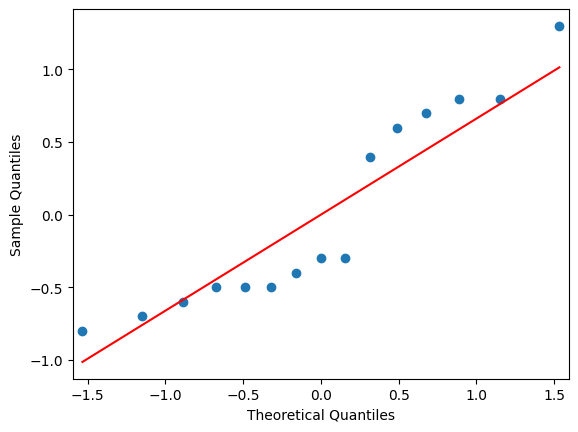

In [ ]:
residuals = res2.resid
fig = sm.qqplot(residuals, line="s")
plt.show()

In [ ]:
AA=np.arange(0, 1, 0.1)
BB=np.arange(0, 1, 0.1)
CC=np.arange(0, 1, 0.1)
Target=1.
inputs= pd.DataFrame(list(itertools.product(AA,BB,CC)), columns=['A','B','C'])
#sum(inputs.iloc[1])
input_target=[]
for i in range(0,len(inputs)):
  dd = sum(inputs.iloc[i])
  if dd == Target:
    input_target.append(inputs.iloc[i])
df2=pd.DataFrame(input_target)
#df

ypred2=res2.predict(df[['A','B','C']])

In [ ]:
fig1 = ff.create_ternary_contour(np.array([data['A'], data['B'], data['C']]), data['Y'],
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian')
fig1.update_layout(title='Interpolated Contour Plot')

# Generate contour plot from quadratic model
ypred2 = res2.predict(df2[['A','B','C']])
fig3 = ff.create_ternary_contour(np.array([df2['A'], df2['B'], df2['C']]), ypred2,
                                 pole_labels=['A', 'B', 'C'],
                                 interp_mode='cartesian')
fig3.update_layout(title='Contour Plot from Quadratic Model')


# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'ternary'}, {'type': 'ternary'}]])

# Add traces from both figures to the subplots
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig3.data:
    fig.add_trace(trace, row=1, col=2)


# Update layout
fig.update_layout(title_text="Interpolated vs interaction Model Contour Plots")

# Show the combined figure
fig.show()

In [ ]:
mod3= smf.ols(formula='Y ~ A + B + C + A:B + A:C + B:C +  I(A**2)+ I(B**2) +I(C**2) - 1', data=data)

res3 = mod3.fit()
res3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     35.20
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.20e-05
Time:                        07:54:06   Log-Likelihood:                -15.081
No. Observations:                  15   AIC:                             42.16
Df Residuals:                       9   BIC:                             46.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             17.7056      0.680     26.040      0.000      16.167      19.244
B              9.1722      0.680     13.490      0.000       7.634      10.710
C             11.3056      0.680     16.628      0.000       9.767      12.844
A:B           13.2222      1.289     10.262      0.000      10.307      16.137
A:C           10.4889      1.289      8.140      0.000       7.574      13.404
B:C           -4.2778      1.289     -3.320      0.009      -7.193      -1.363
I(A ** 2)     -6.0056      0.974     -6.167      0.000      -8.208      -3.803
I(B ** 2)      0.2278      0.974      0.234      0.820      -1.975       2.431
I(C ** 2)      5.0944      0.974      5.232      0.001       2.892       7.297
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.635
Skew:                           0.526   Prob(JB):                        0.441
Kurtosis:                       1.770   Cond. No.                     7.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The reason you are seeing the same 'Df Model' of 5 for both the model with interaction terms and the model with interaction and quadratic terms is related to the nature of mixture designs and how statsmodels handles the model fitting in this context.

In mixture designs, the components are not independent because they must sum to 1 (A + B + C = 1). This constraint introduces linear dependencies between the terms in the model. Specifically, pure quadratic terms like A², B², and C² can be expressed as linear combinations of the linear and interaction terms due to the sum constraint.

For example, A² can be written as A * (1 - B - C) = A - AB - AC. While this isn't a direct linear combination of the terms included in the model, the underlying dependency means that adding the pure quadratic terms might not add truly independent information to the model in the way they would in a standard regression without the sum constraint.

Statsmodels, in this case, is identifying that the addition of the pure quadratic terms does not increase the effective number of independent parameters being estimated by the model, given the existing linear and interaction terms and the mixture constraint. Therefore, the 'Df Model', which represents the number of estimated parameters beyond the intercept (or the effective number of independent variables), remains at 5.

You can also see this reflected in the warning about multicollinearity in the summary output for the model with quadratic terms, which further indicates the linear dependencies among the terms.

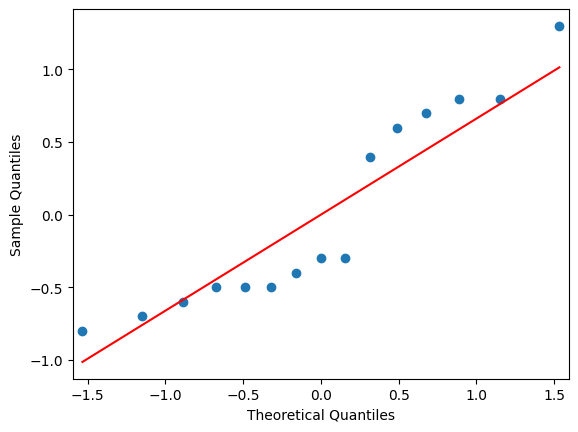

In [ ]:
residuals = res3.resid
fig = sm.qqplot(residuals, line="s")
plt.show()

In [ ]:
AA=np.arange(0, 1, 0.1)
BB=np.arange(0, 1, 0.1)
CC=np.arange(0, 1, 0.1)
Target=1.
inputs= pd.DataFrame(list(itertools.product(AA,BB,CC)), columns=['A','B','C'])
#sum(inputs.iloc[1])
input_target=[]
for i in range(0,len(inputs)):
  dd = sum(inputs.iloc[i])
  if dd == Target:
    input_target.append(inputs.iloc[i])
df3=pd.DataFrame(input_target)
#df

ypred3=res3.predict(df[['A','B','C']])

In [ ]:
fig1 = ff.create_ternary_contour(np.array([data['A'], data['B'], data['C']]), data['Y'],
                                pole_labels=['A', 'B', 'C'],
                                interp_mode='cartesian')
fig1.update_layout(title='Interpolated Contour Plot')

# Generate contour plot from quadratic model
ypred3 = res3.predict(df3[['A','B','C']])
fig4 = ff.create_ternary_contour(np.array([df3['A'], df3['B'], df3['C']]), ypred3,
                                 pole_labels=['A', 'B', 'C'],
                                 interp_mode='cartesian')
fig4.update_layout(title='Contour Plot from Quadratic Model')


# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'ternary'}, {'type': 'ternary'}]])

# Add traces from both figures to the subplots
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig4.data:
    fig.add_trace(trace, row=1, col=2)


# Update layout
fig.update_layout(title_text="Interpolated vs Quadratic Model Contour Plots")

# Show the combined figure
fig.show()

So why are they different?

The model attempts to capture the underlying relationship between the components and the response by estimating coefficients for the terms in the equation (like the linear and interaction terms in your quadratic model).

Whether the model gives a "better" representation depends on how well that mathematical relationship actually fits the data. The interpolated plot is a direct visualization of the data as it is, while the model plot shows what the fitted model predicts the response to be across the mixture space.

You can assess how well the model represents the data by looking at the model's R-squared value, the significance of the terms, and the residual analysis (like the QQ plot you generated). If these indicate a good fit, then the model's contour plot can provide a smoothed and generalized representation of the response, which can be useful for understanding the overall trends and predicting responses at points not included in your original data.